<a href="https://colab.research.google.com/github/PhoenixCC0722/Journey_to_become_DataScientist/blob/main/3_1_6_category_creation_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Searching for the category

For this code along we are only going to use the products DataFrame. However, if you believe there is information in other tables that can help to create categories, please feel free to explore.

In [ ]:
import pandas as pd

In [ ]:
# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

In [ ]:
product_category_df = products_cl.copy()

In [ ]:
product_category_df.head()

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364


## 1.&nbsp; Category creation by search term
Let's start by creating a column `category`. For now we'll fill this column with a blank string `""`.

In [ ]:
product_category_df["category"] = ""
product_category_df.head()

,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,


We can find all the products with certain words in their `description` using `.loc[]` and `.str.contains()`. Here we'll look at all the items that have the word `keyboard` in their description.

In [ ]:
product_category_df.loc[product_category_df["desc"].str.contains("keyboard", case=False)]

,sku,name,desc,price,in_stock,type,category
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,
15,MOS0021,Clearguard Moshi MacBook Pro and Air,Keyboard Protector MacBook Pro 13-inch Retina ...,24.95,0,13835403,
24,APP0277,Apple Wireless Keyboard Keyboard (OEM) Mac,Ultrathin keyboard Apple Bluetooth Spanish (un...,79.00,0,13855401,
64,HGD0012,Henge Docks Click keyboard support iMac,Base to hold the Apple Magic TrackPad and Wire...,29.00,0,8696,
365,LOG0084,Logitech Ultrathin Keyboard Cover Keyboard Cov...,Ultrathin cover and cover with Bluetooth keybo...,89.99,0,12575403,
...,...,...,...,...,...,...,...
9720,PAC2508,Replacement Magic Wireless Keyboard by Matias ...,Keyboard replacement service at the time of pu...,119.99,1,13855401,
9751,MTF0008,Mistify Clean Screens Natural 500ml.,Spray cleaning screens and keyboards.,14.99,1,12085400,
9796,ZAG0026-A,Open - Zagg Rugged Keyboard Folio iPad Messeng...,Case reconditioned keyboard and adjustable pos...,99.99,0,12575403,
9932,APP1472,Apple Magic Keyboard English International,English keyboard Mac and Apple iPad Ultrathin ...,119.00,1,13855401,


Next, we change the value in the category column to `keyboard` for all of these keyboard products.

In [ ]:
product_category_df.loc[product_category_df["desc"].str.contains("keyboard", case=False), "category"] = "keyboard"

Let's take a look at the effect that had on the `category` column.

In [ ]:
product_category_df["category"].value_counts()

            9903
keyboard      89
Name: category, dtype: int64

## 2.&nbsp; Category creation using regex
We can also use a product's `name` to select products for our categories.

In [ ]:
product_category_df.loc[product_category_df["name"].str.contains("apple iphone", case=False)]

,sku,name,desc,price,in_stock,type,category
35,APP0308,AV Cable Adapter Apple iPhone iPad and iPod white,IPhone iPad iPod adapter and AV cable.,45.00,0,1230,
214,REP0100,Color change to White Apple iPhone 4,It is including parts and labor..,94.21,0,"1,44E+11",
215,REP0052,Color change to White Apple iPhone 4,It is including parts and labor..,94.21,0,"1,44E+11",
579,APP0675,Apple iPhone 5S 32GB Space Gray,New Free iPhone 5S 32GB (ME435Y / A).,559.00,0,NaN,
956,APP0823,Apple iPhone 6 16GB Silver,New iPhone 6 16GB Free (MG482QL / A).,639.00,0,NaN,
...,...,...,...,...,...,...,...
9790,AP20455,Like new - Apple iPhone 8 256GB Gold,Apple iPhone 8 reconditioned 256GB in Gold rea...,979.00,0,113291716,
9794,APP2482-A,Open - Apple iPhone 8 Plus 256GB Gold,Refurbished Apple iPhone 8 Plus 256GB Free Gold,1089.00,0,113281716,
9929,APP2477-A,Open - Apple iPhone 8 Plus 64GB Space Gray,Apple iPhone 8 Plus 64GB Space Gray,919.00,0,113281716,
9958,AP20467,Like new - Apple iPhone Silicone Case Cover 7 ...,Reconditioned silicone sleeve microfiber Apple...,45.00,0,11865403,


Looks like we get a lot of accessories included in this search. We can refine this using a little regex. Here, we will add `.{0,7}` at the beginning of the search: this means we will find all `apple iphone`s that have 7 or less characters preceding the term "apple iphone" - if there's 8 characters preceding the search term, it won't be found. This should help refine our search by using the nomenclature of the DataFrame to our advantage.

If you feel unsure about regex, please use [regex101](https://regex101.com/). It's really useful for checking your code, and parts of other people's code that you're unsure about.

In [ ]:
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple iphone", case=False)]

,sku,name,desc,price,in_stock,type,category
579,APP0675,Apple iPhone 5S 32GB Space Gray,New Free iPhone 5S 32GB (ME435Y / A).,559.0,0,NaN,
956,APP0823,Apple iPhone 6 16GB Silver,New iPhone 6 16GB Free (MG482QL / A).,639.0,0,NaN,
961,APP0829,Apple iPhone 6 Plus 16GB Silver,New iPhone 6 Plus 16G Free (MGA92QL / A).,749.0,0,NaN,
962,APP0822,Apple iPhone 6 16GB Space Gray,New iPhone 6 16GB Free (MG472QL / A).,639.0,0,NaN,
963,APP0825,Apple iPhone 6 64GB Space Gray,New iPhone 6 64GB Free (MG4F2QL / A).,749.0,0,NaN,
...,...,...,...,...,...,...,...
9585,APP1634-A,Open - Apple iPhone 7 Plus 32GB Black,New 32GB Apple iPhone 7 Plus Free Black,779.0,0,85651716,
9587,APP2540-A,Open - Apple iPhone Leather Folio X Baya,Leather case with box and official cover Apple,109.0,0,11865403,
9714,APP2562-A,Open - Apple iPhone Leather Case Cover Red,Reconditioned skin sheath official Apple desig...,45.0,0,11865403,
9794,APP2482-A,Open - Apple iPhone 8 Plus 256GB Gold,Refurbished Apple iPhone 8 Plus 256GB Free Gold,1089.0,0,113281716,


Now we can use the same trick as before to set the category - selecting the `category` column and setting it to the string of our choice.

In [ ]:
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple iphone", case=False), "category"] = "smartphone"

In [ ]:
product_category_df["category"].value_counts()

              9634
smartphone     269
keyboard        89
Name: category, dtype: int64

## 3.&nbsp; One product with multiple categories
A product may fit into multiple categories. To help us create multiple categories for one product, we will use the python addition assignment `+=`. The addition assignment is a shorthand way to add something (number, string, etc...) to a variable without changing the variable name.

Let's have a look at a couple of examples.

In [ ]:
a = 10
a = a + 5
a

15

In [ ]:
a = 10
a += 5
a

15

In [ ]:
b = "Tyrannosaurus"
b = b + " rex"
b

'Tyrannosaurus rex'

In [ ]:
b = "Tyrannosaurus"
b += " rex"
b

'Tyrannosaurus rex'

Now let's look at how this can help us in our category creation.

First, we'll reset all the values in the category column to an empty string `""`.

In [ ]:
product_category_df["category"] = ""

Now, let's create some categories and utilise the addition assignment.

In [ ]:
product_category_df.loc[product_category_df["desc"].str.contains("keyboard", case=False), "category"] += ", keyboard"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple iphone", case=False), "category"] += ", smartphone"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipod", case=False), "category"] += ", ipod"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipad|tablet", case=False), "category"] += ", tablet"
product_category_df.loc[product_category_df["name"].str.contains("imac|mac mini|mac pro", case=False), "category"] += ", desktop"

In [ ]:
product_category_df["category"].value_counts()

                       8362
, desktop               923
, tablet                307
, smartphone            269
, keyboard               83
, ipod                   42
, keyboard, tablet        4
, keyboard, desktop       2
Name: category, dtype: int64

As you can see, some products now have 2 categories instead of just one. At the end, you can use your skills with string to tidy up the opening comma and space in the `category` column.

# Challenge. Your categories
Now it's your turn. We'll reset the Dataframe so that no categories exist, and it's up to you to create the categories based on keywords in the name and description. Feel free to go wild and make as many categories as you like.
* Remember you can also use regex to refine your searches.
* Remember you can use the or operator `|` to search for multiple terms at once.
* Remember to tidy up any untidy strings at the end.

In [ ]:
# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

product_category_df = products_cl.copy()

Concatenate text data from the "name" and "desc" columns into a single string

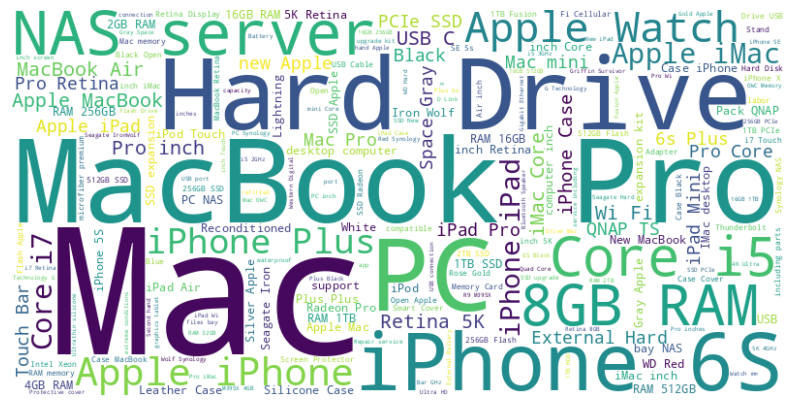

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(products_cl['name']) + ' '.join(products_cl['desc'])
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

First, we'll reset all the values in the category column to an empty string "".

In [ ]:
product_category_df["category"] = ""
product_category_df.head()

,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,


Now, let's create some categories and utilise the addition assignment.

In [ ]:
product_category_df.loc[product_category_df["desc"].str.contains("keyboard", case=False), "category"] += " keyboard"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple iphone", case=False), "category"] += " smartphone"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipod", case=False), "category"] += " ipod"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipad|tablet", case=False), "category"] += " tablet"
product_category_df.loc[product_category_df["name"].str.contains("imac|mac mini|mac pro", case=False), "category"] += " desktop"

In [ ]:
product_category_df["category"].value_counts() #8362 entries

                     8362
 desktop              923
 tablet               307
 smartphone           269
 keyboard              83
 ipod                  42
 keyboard tablet        4
 keyboard desktop       2
Name: category, dtype: int64

Again, we can create more categories as much as possible.

In [ ]:
product_category_df.info() #9992 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
 6   category  9992 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 546.6+ KB


check out what are the name and desc from the rest (9992-8632) = 1360 entries

In [ ]:
product_category_df.loc[~(product_category_df["name"].str.contains("mac|apple|ipod|ipad|iphone", case=False) | product_category_df["desc"].str.contains("keyboard|mac|apple|ipod|ipad|iphone", case=False)), :]

,sku,name,desc,price,in_stock,type,category
14,MOS0013,Adapter Moshi FireWire 400 to FireWire 800,FireWire 400 adapter cable FireWire 800.,20.00,0,1325,adapter adapter adapter adapter adapter
23,MOB0007,Mobee Magic Charger Charger Magic Mouse,Wireless Charger for Magic Mouse,49.99,0,12355400,mouse mouse charger mouse charger mouse charg...
30,OND0073,Mini DisplayPort to HDMI Cable 18m,Cable with Mini DisplayPort to HDMI (audio + v...,22.99,0,1325,cable cable cable cable cable
31,MOS0042,Adapter Moshi Mini Display Port to VGA,Cable Adapter Mini Display Port to VGA.,34.99,0,1325,adapter adapter adapter adapter adapter
42,MOS0044,Moshi FireWire 800 Cable,FireWire 800 Cable 18 m.,34.99,0,1325,cable cable cable cable cable
...,...,...,...,...,...,...,...
9951,WDT0417,"WD Hard Drive 6TB Gold 35 ""Servers",Hard Western Digital 6TB 35 inches SATA 6 Gb /...,329.00,0,12655397,Hard_drive Hard_drive Hard_drive Hard_drive H...
9952,WDT0416,"WD Hard Drive 8TB Gold 35 ""Servers",Hard Western Digital 8TB 35 inches SATA 6 Gb /...,419.00,1,12655397,Hard_drive Hard_drive Hard_drive Hard_drive H...
9953,WDT0415,"WD Hard Drive 10TB Gold 35 ""Servers",Hard Western Digital 10TB 35 inches SATA 6 Gb ...,519.00,0,12655397,Hard_drive Hard_drive Hard_drive Hard_drive H...
9954,WDT0414,"WD Hard Drive 12TB Gold 35 ""Servers",Hard Western Digital 12TB 35 inches SATA 6 Gb ...,689.00,0,12655397,Hard_drive Hard_drive Hard_drive Hard_drive H...


Try to add the new four categories: Adapter, Hard Drive, Mouse, Cable

In [ ]:
product_category_df.loc[product_category_df["name"].str.contains("adapter", case=False), "category"] += " adapter"
product_category_df.loc[product_category_df["name"].str.contains("Hard Drive", case=False), "category"] += " Hard_drive"
product_category_df.loc[product_category_df["name"].str.contains("mouse", case=False), "category"] += " mouse"
product_category_df.loc[product_category_df["name"].str.contains("cable", case=False), "category"] += " cable"
product_category_df.loc[product_category_df["name"].str.contains("charger", case=False), "category"] += " charger"
product_category_df["category"].value_counts().reset_index()

,index,category
0,,7411
1,desktop desktop,884
2,Hard_drive Hard_drive Hard_drive Hard_drive H...,330
3,tablet tablet,307
4,smartphone smartphone,269
5,adapter adapter adapter adapter adapter adapter,251
6,cable cable cable cable cable cable,245
7,charger charger charger charger charger,85
8,keyboard keyboard,81
9,ipod ipod,42


## 4.&nbsp; [BONUS] Using `type` to create categories
There could be another way to create categories, but this one you'll have to explore this one alone.

We have the mysterious column `type` in the `products` table. This could potentially be ready-made categories labelled with numbers instead of words. Let's investigate.

In [ ]:
category_type_df = products_cl.copy()

Here are the `type`s that have the most products.

In [ ]:
category_type_df.groupby("type").count().nlargest(10, "sku")

,sku,name,desc,price,in_stock
type,,,,,
11865403,1057,1057,1057,1057,1057
12175397,939,939,939,939,939
1298,783,783,783,783,783
11935397,562,562,562,562,562
11905404,454,454,454,454,454
1282,373,373,373,373,373
12635403,362,362,362,362,362
13835403,269,269,269,269,269
"5,74E+15",247,247,247,247,247


Let's have a look at the first `type` to see if we can make categories from this column.

In [ ]:
category_type_df.loc[category_type_df["type"] == "11865403"].sample(10)

,sku,name,desc,price,in_stock,type
3042,TUC0242,Tucano Tosto Case + Protector iPhone 6 / 6S Pl...,Cover for iPhone 6 / 6S Plus.,29.90,0,11865403
1098,SPE0128,Candishell Speck Case iPhone 6 White / Dark Gray,ultra resistant iPhone 6. Housing,24.99,0,11865403
8336,MUV0190,Muvit Crystal Electroplating Case iPhone X Black,IPhone case that combines lightness and durabi...,14.95,0,11865403
9262,AP20443,Second hand - Apple Leather Case leather case ...,ultrathin leather case and microfiber premium ...,55.00,0,11865403
8410,APP2537,Apple iPhone leather case Leather Case 8 Plus ...,ultrathin leather case and microfibre premium ...,59.00,0,11865403
8869,TCH0012,Tech21 Evo Check Case iPhone X Rosa,X iPhone case studied to overcome multiple dro...,39.99,1,11865403
8361,APP2515,Silicon Case Cover Apple iPhone 8/7 Violeta,Ultrathin silicone case and microfiber premium...,39.00,0,11865403
8904,OTT0170,OtterBox iPhone Case X Symmetry Clear Clear,Transparent cover to protect the iPhone X with...,34.99,1,11865403
3026,MOX0025,Moxie Man Picto Case iPhone 6 / 6S Transparent,Cover for iPhone 6 / 6S.,19.99,0,11865403
4252,APP1551,Leather Case Apple iPhone 6 / 6S Gray Storm,ultrathin leather case and microfiber premium ...,55.00,0,11865403


Looks like this is a category of phone cases.

Let's have a look at the 2nd largest type to see if that's also a clear category.

In [ ]:
category_type_df.loc[category_type_df["type"] == "12175397"].sample(10)

,sku,name,desc,price,in_stock,type
8666,PAC2453,Synology DS918 + NAS Server | 16GB RAM | 48TB ...,NAS server of the Plus Series for companies se...,2772.67,0,12175397
3154,PAC1220,Synology DS716 + Pack | WD 6TB Network,Synology DS716 + Pack with 6TB (2x3TB) WD Red ...,729.90,0,12175397
8822,PAC2297,DS218play Synology NAS Server | 16TB (2x8TB) W...,2-bay NAS server can accommodate 4K Ultra HD f...,958.99,0,12175397
3230,PAC1303,Pack QNAP TS-451 + | 2GB RAM + WD Red 12TB,Pack QNAP TS-451 + with 2GB of RAM memory + 12...,994.99,1,12175397
8836,PAC2303,Synology DS118 NAS Server | 8TB (1x8TB) WD Red,1 bay NAS server with capacity for home use or...,534.99,0,12175397
7025,PAC2311,Synology DS1517 + NAS Server | 2GB RAM | 60TB ...,NAS server with 2GB of RAM and 60TB for Mac an...,3305.81,0,12175397
4631,PAC1446,WD My Cloud EX2100 Pack | WD 8TB Network,WD My Cloud EX2100 + 8TB (2x4TB) Network WD Ha...,647.99,0,12175397
4668,PAC1866,Synology DS416play | 8TB (4x2TB) WD Red,8TB NAS capacity (4x2TB) WD Red hard drives fo...,830.99,0,12175397
1266,PAC0588,Synology DS415 + Pack | WD 16TB Network,Synology DS415 + Pack 16TB WD Network for Mac ...,1370.99,0,12175397
922,PAC0481,Synology DS415 Pack play | Seagate 16TB,Synology DS415 + Pack 16TB play Seagate Deskto...,941.59,0,12175397


Looks like this category is full of servers.

I wonder how many `type`s account for most of our products?

In [ ]:
n = 30
print(f"With the {n} largest types, we account for {((category_type_df.groupby('type').count().nlargest(n, 'sku')['sku'].sum()) / (category_type_df.shape[0]) * 100).round(2)}% of all products.")

With the 30 largest types, we account for 78.4% of all products.


Looks like we can simply investigate 30 types and set the categories, then the remaining 20% of products can have the category `other`.

Use the skills you learnt above to change the category for each type.

HOW can i use the .unique() to search out all the 30 different categories?

In [ ]:
# here are the types that have the most products, check the first 30 types.
category_type_df.groupby("type").count().nlargest(30, "sku")

,sku,name,desc,price,in_stock
type,,,,,
11865403,1057,1057,1057,1057,1057
12175397,939,939,939,939,939
1298,783,783,783,783,783
11935397,562,562,562,562,562
11905404,454,454,454,454,454
1282,373,373,373,373,373
12635403,362,362,362,362,362
13835403,269,269,269,269,269
"5,74E+15",247,247,247,247,247


What is the 1. Type with the most products.

In [ ]:
category_type_df.loc[category_type_df["type"] == "11865403"].sample(10)

,sku,name,desc,price,in_stock,type
9723,ICA0111,Incase Frame Bumper Case iPhone X Gray,Transparent cover to protect the iPhone X with...,29.99,1,11865403
5361,GRT0444,Griffin Survivor iPhone Case Summit 7 Black / ...,hard case with screen protector and clip suppo...,44.99,0,11865403
7796,AP20205,Second hand - Apple iPhone Silicone Case Cover...,Reconditioned ultrathin silicone case and micr...,45.00,0,11865403
8351,MUV0191,Muvit Crystal Electroplating Case iPhone X Rosa,IPhone case that combines lightness and durabi...,14.95,0,11865403
7171,AP20120,Like new - Apple Leather Case iPhone 6 / 6S br...,Reconditioned sleeve leather and microfiber pr...,49.00,0,11865403
2540,APP1151,Case Apple iPhone 6 Plus / 6s Plus Candy Brown...,ultrathin leather case and microfiber premium ...,59.00,0,11865403
9479,NTE0040-A,Open - KX NuGuard NewerTech iPhone Case SE / 5...,Reconditioned iPhone Case SE / 5s / 5 ultra re...,60.99,0,11865403
8760,APP2548,Apple iPhone Silicone Case X Case Black,Silicone Case Apple official,45.00,1,11865403
5215,APP1674,Silicone Case Cover Apple iPhone 7 Plus Cacao,Ultrathin silicone case and microfiber premium...,45.00,0,11865403
3575,MOS0179,Moshi iGlaze Case Luxe iPhone 6 / 6S Gold,acrólico transparent protective case for iPhon...,55.00,1,11865403


this category is about CASE. How can i use the Regex to find out the most common used item in the 'name' is 'case', then I can easily set the category as 'case'?

In [ ]:
import nltk
nltk.download('punkt')

top_N = 5
# replace all non-alphanumeric characters
category_type_df["name_rep"] = category_type_df.name.str.lower().str.replace('\W', ' ', regex=True)

# tokenize, Tokenizing the words, splits each string into a list.
# In this example, looking at df will show a tok column, where each row is a list
category_type_df['tok'] = category_type_df.name_rep.apply(nltk.tokenize.word_tokenize)

# all tokenized words to a list
words = category_type_df.tok.tolist()  # this is a list of lists
words = [word for list_ in words for word in list_]

# frequency distribution
word_dist = nltk.FreqDist(words)

# remove stopwords
# stopwords = nltk.corpus.stopwords.words('english')
# words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)

# output the results
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])
print(rslt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     Word  Frequency
0   apple       2619
1  iphone       1961
2    case       1954
3     pro       1775
4   black       1434


AttributeError: 'FreqDist' object has no attribute 'Word'

In [ ]:
# Get the top 3 most common words and their frequencies
top_3_words = word_dist.most_common(3)

# Extract the words from the tuples
top_3_words_str = [word for word, freq in top_3_words]

# Concatenate the words
category_1st = ' '.join(top_3_words_str)
print(category_1st)

apple iphone case


Now, we can apply the same procedure for the 2nd largest type to see if that's also a clear category.

In [ ]:
category_type_df.loc[category_type_df["type"] == "12175397"].sample(10)

,sku,name,desc,price,in_stock,type,name_rep,tok
1243,PAC1816,synology ds1515 l 50tb 5x10tb seagate iron...,NAS Synology DS1815 + 50TB hard drive Seagate ...,3786.94,0,12175397,synology ds1515 l 50tb 5x10tb seagate iron...,"[synology, ds1515, l, 50tb, 5x10tb, seagate, i..."
3133,PAC1401,qnap ts 453mini 8gb ram mac and pc server nas,8-bay NAS Server for Mac and PC.,709.99,0,12175397,qnap ts 453mini 8gb ram mac and pc server nas,"[qnap, ts, 453mini, 8gb, ram, mac, and, pc, se..."
8496,PAC2403,ds418play synology nas server 10gb ram 8tb...,4-bay NAS server to accommodate 4K Ultra HD files,1041.31,0,12175397,ds418play synology nas server 10gb ram 8tb...,"[ds418play, synology, nas, server, 10gb, ram, ..."
8480,PAC2395,ds418play synology nas server 6gb ram 12tb...,4-bay NAS server to accommodate 4K Ultra HD files,1116.94,0,12175397,ds418play synology nas server 6gb ram 12tb...,"[ds418play, synology, nas, server, 6gb, ram, 1..."
6385,SYN0165,synology rackstation rs18017xs nas 12 bays s...,Nas Format rack 12 bays with Intel Xeon 6-core...,5499.00,0,12175397,synology rackstation rs18017xs nas 12 bays s...,"[synology, rackstation, rs18017xs, nas, 12, ba..."
2935,SYN0128,synology ds416 nas server mac and pc,Synology NAS server 4 bays and DLNA Media Center.,385.99,0,12175397,synology ds416 nas server mac and pc,"[synology, ds416, nas, server, mac, and, pc]"
5921,PAC1740,qnap ts 131p 2tb 1x2tb seagate ironwolf,NAS Seagate 2TB capacity for Mac and PC IronWolf,276.98,0,12175397,qnap ts 131p 2tb 1x2tb seagate ironwolf,"[qnap, ts, 131p, 2tb, 1x2tb, seagate, ironwolf]"
8604,PAC2367,synology ds218 nas server 2gb ram 20tb ...,NAS storage server integrated with special foc...,1222.99,0,12175397,synology ds218 nas server 2gb ram 20tb ...,"[synology, ds218, nas, server, 2gb, ram, 20tb,..."
6416,SYN0121-A,open synology nas server ds216play mac and p...,NAS server Mac and PC with open packaging 2 ba...,260.99,0,12175397,open synology nas server ds216play mac and p...,"[open, synology, nas, server, ds216play, mac, ..."
5925,PAC1744,qnap ts 131p 8tb 1x8tb seagate ironwolf,NAS Seagate 8TB capacity for Mac and PC IronWolf,526.98,0,12175397,qnap ts 131p 8tb 1x8tb seagate ironwolf,"[qnap, ts, 131p, 8tb, 1x8tb, seagate, ironwolf]"


In [ ]:
import nltk
nltk.download('punkt')
top_N = 5
# replace all non-alphanumeric characters
category_type_df["name_rep"] = category_type_df.name.str.lower().str.replace('\W', ' ', regex=True)

# tokenize, Tokenizing the words, splits each string into a list.
# In this example, looking at df will show a tok column, where each row is a list
category_type_df['tok'] = category_type_df.name_rep.apply(nltk.tokenize.word_tokenize)

# all tokenized words to a list
words = category_type_df.tok.tolist()  # this is a list of lists
words = [word for list_ in words for word in list_]

# frequency distribution
word_dist = nltk.FreqDist(words)
# output the results
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])
print(rslt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     Word  Frequency
0   apple       2619
1  iphone       1961
2    case       1954
3     pro       1775
4   black       1434


In [ ]:

# Get the top 3 most common words and their frequencies
top_3_words = word_dist.most_common(3)

# Extract the words from the tuples
top_3_words_str = [word for word, freq in top_3_words]

# Concatenate the words
category_1st = ' '.join(top_3_words_str)
print(category_1st)

apple iphone case
